In [1]:
import numpy as np
from text_processing.process_data import ProcessData
from text_processing.dea import DataAnalysisExploration
import warnings

warnings.filterwarnings("ignore")


## Data Exploratory and Analysis

In [2]:
# Instantiate process data class
process_data = ProcessData()


### Initial dataset (before normalizing data distribution)

In [3]:
# Initial dataset after preprocessing and adding a column for the sentence length
preprocessed_dataset_with_count = process_data.preprocess_dataset_with_count()
preprocessed_dataset_with_count.head()


,sentence,language,sentence_length
0,dili outubru gabinete apoiu atividade kónjuge ...,tet,277
1,treinamentu ne’e ninia objetivu prinsipál mak ...,tet,233
2,iha loron daruak hosi treinamentu ne’e partisi...,tet,289
3,partisipante na’in-56 iha treinamentu ne’e mai...,tet,86
4,komunidade iha suku bikeli ho makadade agrades...,tet,321


In [4]:
# Confirm that the input data is cleaned.
clean = preprocessed_dataset_with_count[
    (preprocessed_dataset_with_count["sentence"] == "") & (preprocessed_dataset_with_count["sentence"] == " ")
]
try:
    assert len(clean) == 0
    print("Data is cleaned.")
except AssertionError:
    print("Data is NOT cleaned.")


Data is cleaned.


In [5]:
# Initial dataset
dea = DataAnalysisExploration(preprocessed_dataset_with_count)


In [6]:
# Word summary
print("Before normalized: ")
dea.words_summary()


Before normalized: 


,language,max_words/sentence,min_words/sentence,avg_words/sentence,total_words_in_doc
0,pt,1122,1,20.886116,606867
1,id,1746,1,16.473219,525298
2,en,220,1,18.990061,655328
3,tet,208,2,29.117407,527258


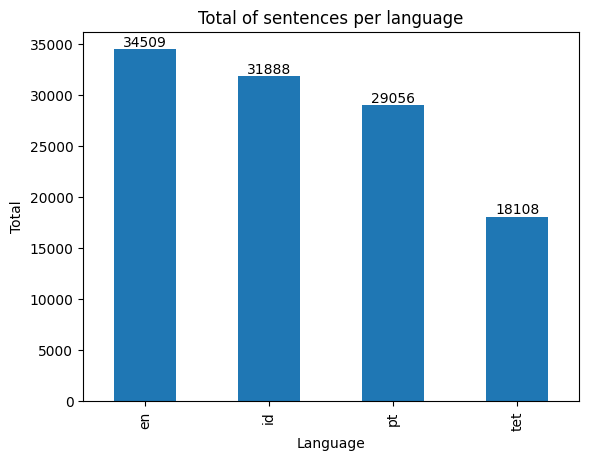

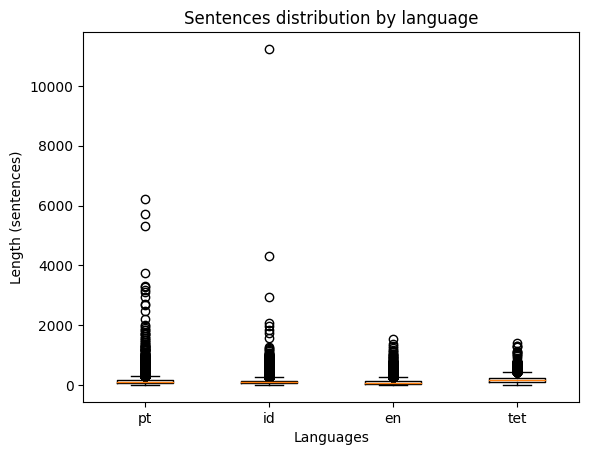

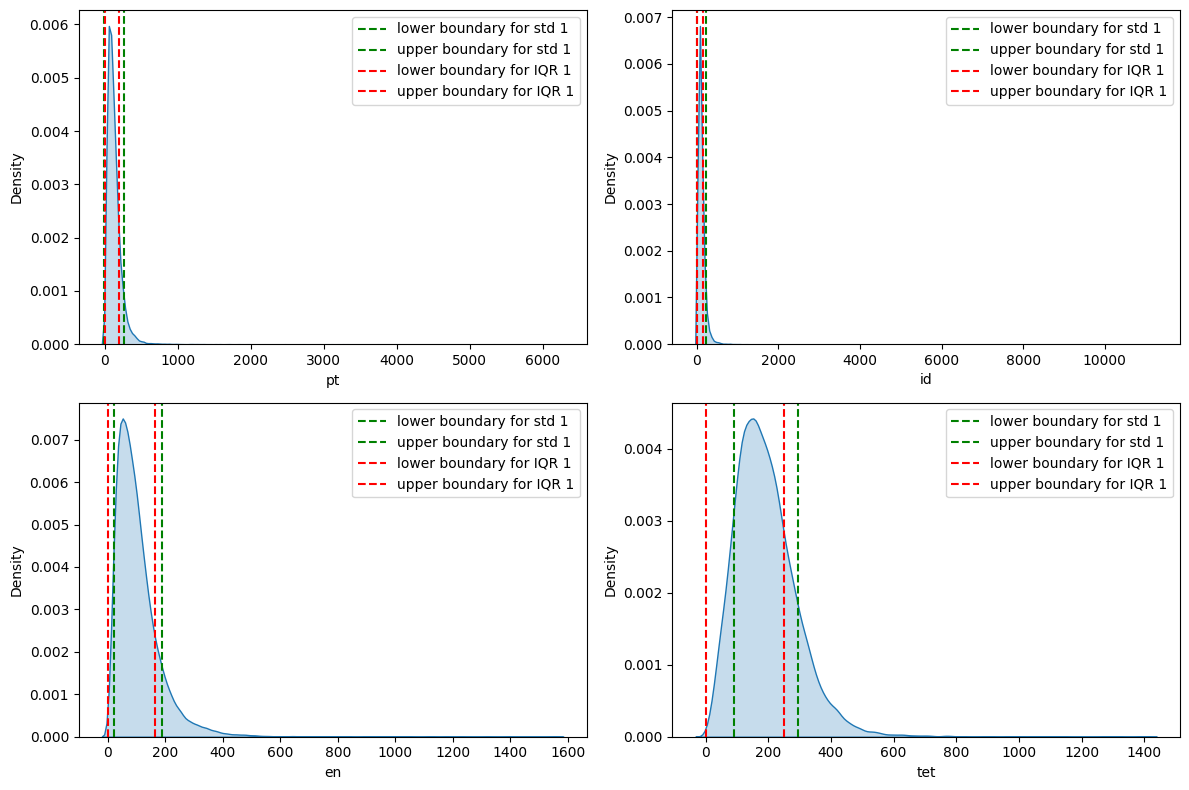

In [7]:
# Display total sentences per language and vizualise them in graphs.
dea.display_data_in_bar()
dea.display_data_in_boxplot()
dea.display_data_in_gaussian_dist(display_lines=True)


### Final dataset (after normalizing data distribution)

In [8]:
# Final dataset
normalized_dataset = process_data.normalize_dataset()
normalized_dataset.head()


,sentence,language,sentence_length
1,treinamentu ne’e ninia objetivu prinsipál mak ...,tet,233
3,partisipante na’in-56 iha treinamentu ne’e mai...,tet,86
7,enkuantu jenerál manajer cefobom antoninho dou...,tet,153
8,manufahi dezembru eis jornalista rádiu komunid...,tet,235
10,iha fatin hanesan eis jornalista rádiu komunid...,tet,223


In [9]:
dea_final = DataAnalysisExploration(normalized_dataset)


In [10]:
# Words summary
print("After normalized: ")
dea_final.words_summary()


After normalized: 


,language,max_words/sentence,min_words/sentence,avg_words/sentence,total_words_in_doc
0,pt,50,1,17.088824,441917
1,id,45,1,14.199169,416774
2,en,51,1,16.769794,535644
3,tet,46,2,22.315733,293742


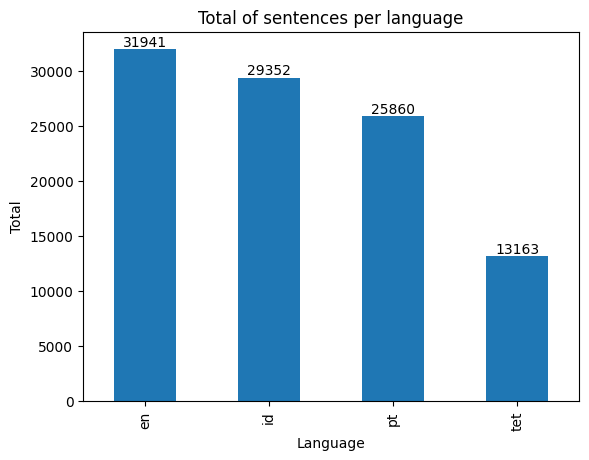

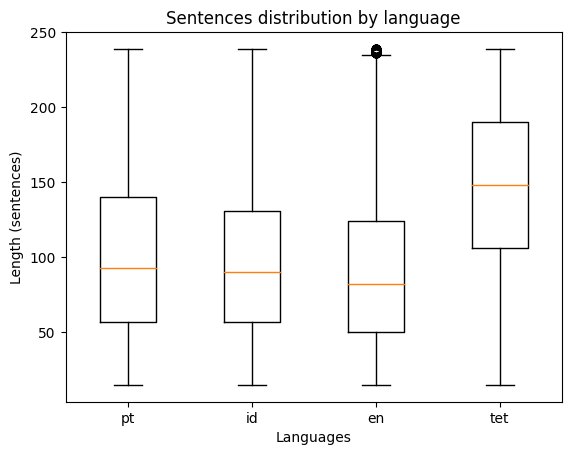

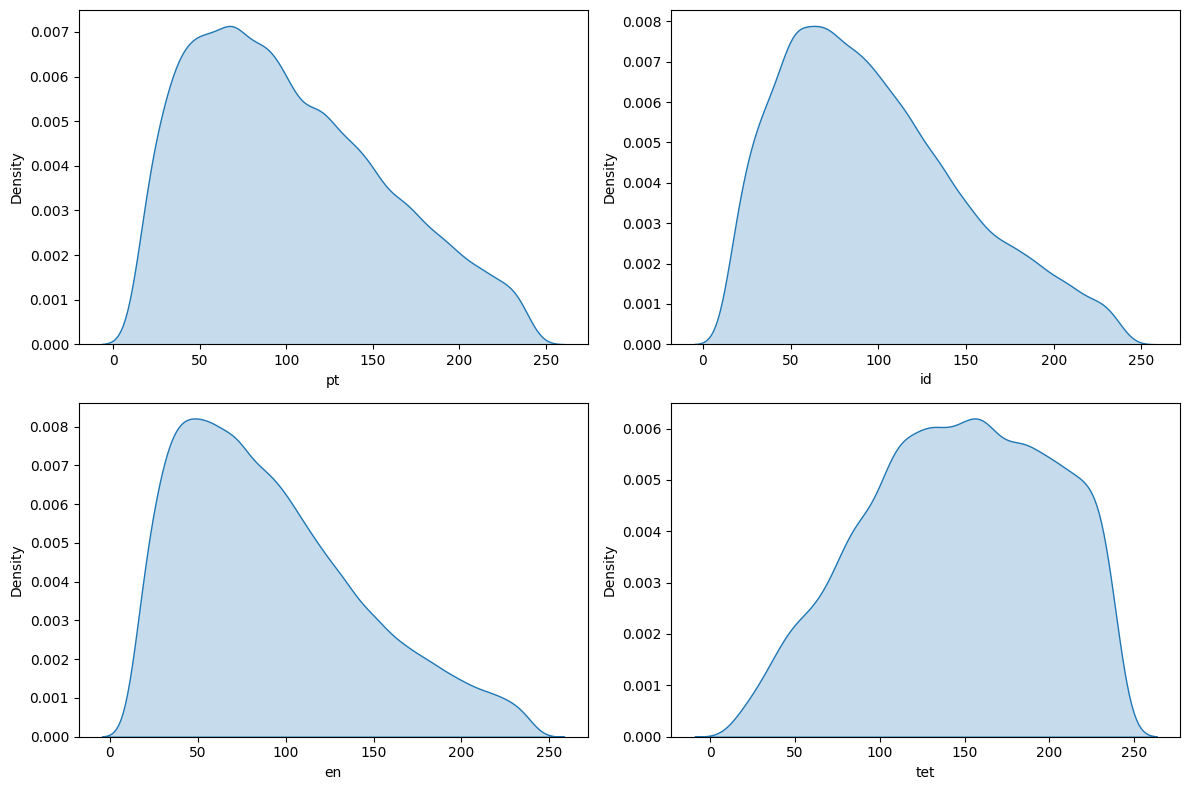

In [11]:
# Vizualize the final dataset
dea_final = DataAnalysisExploration(normalized_dataset)
dea_final.display_data_in_bar()
dea_final.display_data_in_boxplot()
dea_final.display_data_in_gaussian_dist(display_lines=False)


In [13]:
# Check whether the normalized_dataset equals to total_data_after_removing_outliers
try:
    assert len(normalized_dataset) == len(process_data.remove_outliers_data())
    print("Test passed.")
except AssertionError:
    print("The total is different.")


Test passed.


## Clustering

In [14]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, Birch, AgglomerativeClustering


# Generate plot for each of the clustering algorithms
dea_final.display_data_in_clustering(KMeans, "K-Means", using_random_state=True)
dea_final.display_data_in_clustering(
    GaussianMixture, "Gaussian-Mixture", using_n_components=True, using_random_state=True
)
dea_final.display_data_in_clustering(AgglomerativeClustering, "Agglomerative")
dea_final.display_data_in_clustering(Birch, "Birch")


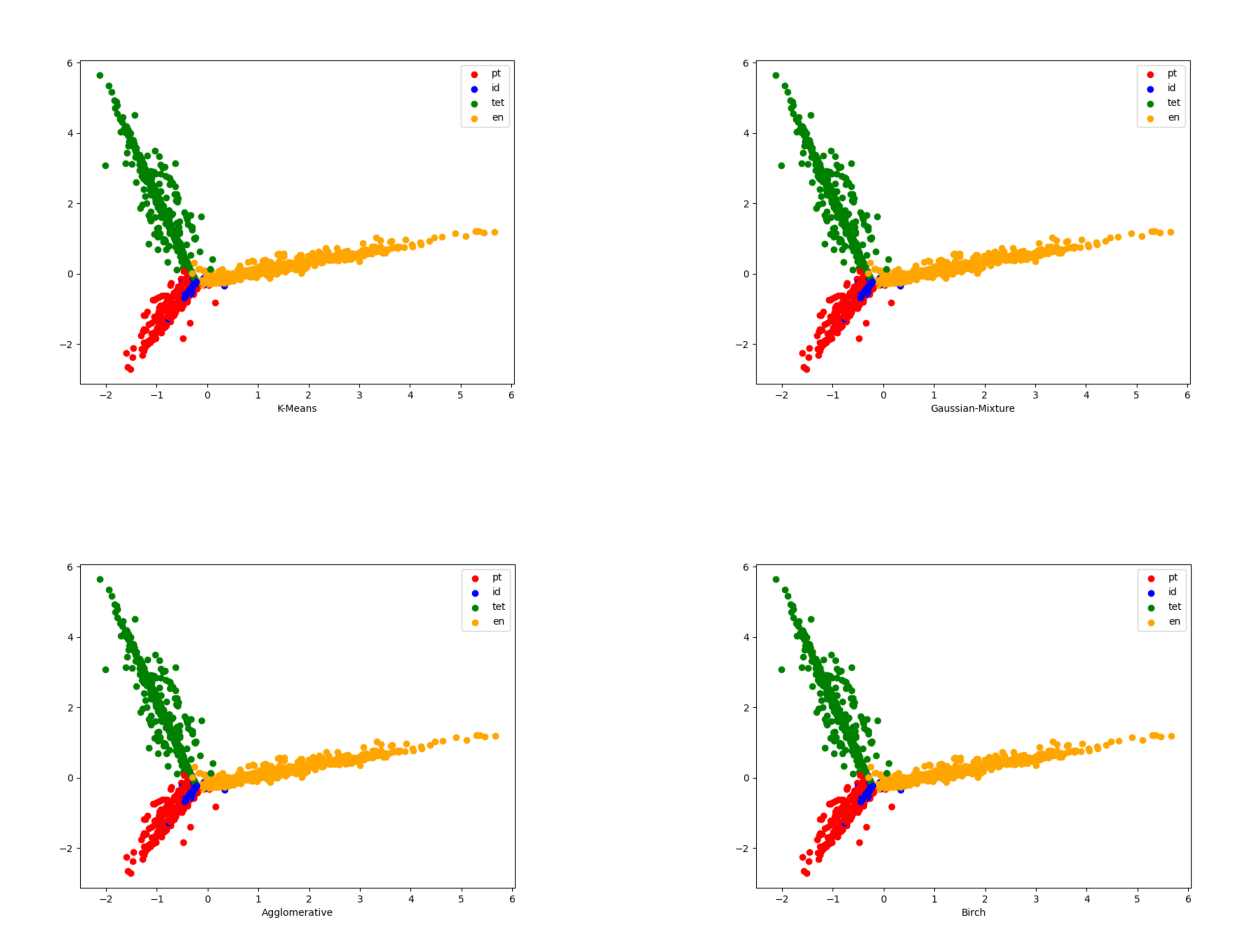

In [15]:
# Compile plots in an image
dea_final.display_images("k-means.png", "gaussian-mixture.png", "agglomerative.png", "birch.png")
